# Pneumonia Detection using Convolutional Neural Network

In [1]:
from IPython.display import Image
Image(url= "https://www.mdpi.com/applsci/applsci-10-00559/article_deploy/html/images/applsci-10-00559-g010.png")

## pneumonia Description

Pneumonia is an infection that affects one or both lungs. It causes the air sacs, or alveoli, of the lungs to fill up with fluid or pus. Bacteria, viruses, or fungi may cause pneumonia. To diagnose pneumonia, your doctor will review your medical history, perform a physical exam, and order diagnostic tests such as a chest X-ray. This information can help your doctor determine what type of pneumonia you have.Pneumonia can be very serious and even life-threatening. Vaccines can help prevent some types of pneumonia. Good hygiene (washing your hands often), quitting smoking, and keeping your immune system strong by getting regular physical activity and eating healthy are other ways to lower your risk of getting pneumonia.

# Collection of Data

Training and testing dataset is collected from kaggle and can be directly downloaded form the link given below

link-https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import os
from random import shuffle
from PIL import Image ,ImageOps

import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from os import listdir
from os.path import isfile, join

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, Dropout, BatchNormalization, MaxPooling2D, Conv2D, Flatten, Dense
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping


# Preprocessing

In [3]:
train_normal='F:\\data\\chest_xray\\train\\NORMAL'
train_pneumonia='F:\\data\\chest_xray\\train\\PNEUMONIA'

In [4]:
train_data_normal=[]
def extract_pixcels():
    
   
    for img in os.listdir(train_normal):
        
        path=os.path.join(train_normal,img)
        img = Image.open(path)
        size=(250,250)
        img= img.resize(size)
        img=ImageOps.grayscale(img)
        img=np.array(img)
        img=img.flatten()
        img=np.array(img)
        train_data_normal.append(img)
      
    
    return train_data_normal

In [5]:
extract_pixcels()


[array([ 23,  20,  19, ..., 111, 112, 112], dtype=uint8),
 array([14, 22, 25, ...,  0,  0,  0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 2], dtype=uint8),
 array([39, 44, 47, ..., 11, 12, 12], dtype=uint8),
 array([77, 73, 65, ...,  0,  0,  0], dtype=uint8),
 array([124, 127, 130, ...,   0,   0,   0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([ 6,  6, 18, ...,  0,  0,  0], dtype=uint8),
 array([16,  4,  0, ...,  0,  0,  0], dtype=uint8),
 array([60, 57, 54, ...,  0,  0,  0], dtype=uint8),
 array([ 97, 113, 113, ...,   0,   0,   0], dtype=uint8),
 array([ 8, 10, 19, ...,  0,  0,  0], dtype=uint8),
 array([137, 132, 123, ...,   0,   0,   0], dtype=uint8),
 array([39, 42, 48, ...,  0,  0,  0], dtype=uint8),
 array([1, 0, 1, ..., 0, 0, 1], dtype=uint8),
 array([102, 106, 107, ...,   0,   0,   0], dtype=uint8),
 array([ 97, 100, 103, ...,   0,   0,   0], dtype=uint8),
 array([241, 243, 248, ...,   0,   0,   0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=ui

In [6]:
len(train_data_normal)

1341

In [7]:
train_data_normal[0]

array([ 23,  20,  19, ..., 111, 112, 112], dtype=uint8)

In [8]:
train_data_normal[0].size

62500

In [9]:
250*250

62500

In [10]:
train_data_normal=np.array(train_data_normal)

In [11]:
train_data_normal

array([[ 23,  20,  19, ..., 111, 112, 112],
       [ 14,  22,  25, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   2],
       ...,
       [ 35,  93,  71, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [ 81,  50,  76, ...,  29,  25,  26]], dtype=uint8)

In [12]:
train_data_normal.shape

(1341, 62500)

In [13]:
label_train_normal=np.zeros(shape=[1341])

In [14]:
label_train_normal

array([0., 0., 0., ..., 0., 0., 0.])

In [15]:
train_data_pneumonia=[]
def extract_pixcels():
    
   
    for img in os.listdir(train_pneumonia):
        
        path=os.path.join(train_pneumonia,img)
        img = Image.open(path)
        size=(250,250)
        img= img.resize(size)
        img=ImageOps.grayscale(img)
        img=np.array(img)
        img=img.flatten()
        img=np.array(img)
        train_data_pneumonia.append(img)
      
    
    return train_data_pneumonia

In [16]:
extract_pixcels()

[array([18, 20, 27, ..., 15, 15, 15], dtype=uint8),
 array([63, 65, 72, ...,  0,  0,  0], dtype=uint8),
 array([18, 23, 31, ...,  0,  0,  0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([23, 29, 33, ..., 35, 34, 48], dtype=uint8),
 array([131, 141, 151, ...,  26,  17,  10], dtype=uint8),
 array([61, 59, 52, ..., 30, 30, 30], dtype=uint8),
 array([ 24,  14, 107, ...,   0,   0,   0], dtype=uint8),
 array([21, 27, 31, ..., 28, 28, 28], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([100, 101, 103, ...,  44,  45,  84], dtype=uint8),
 array([1, 3, 3, ..., 0, 0, 0], dtype=uint8),
 array([51, 51, 50, ..., 48, 48, 48], dtype=uint8),
 array([56, 53, 54, ...,  8,  8,  8], dtype=uint8),
 array([ 8, 10, 11, ...,  0,  0,  0], dtype=uint8),
 array([62, 63, 65, ..., 16, 19, 18], dtype=uint8),
 array([46, 46, 46, ..., 40, 40, 40], dtype=uint8),
 array([43, 44, 48, ...,  1,  0,  0], dtype=uint8),
 array([35, 34, 33

In [17]:
len(train_data_pneumonia)

3875

In [18]:
train_data_pneumonia[0]

array([18, 20, 27, ..., 15, 15, 15], dtype=uint8)

In [19]:
train_data_pneumonia[0].shape

(62500,)

In [20]:
250*250

62500

In [21]:
train_data_pneumonia=np.array(train_data_pneumonia)


In [22]:
train_data_pneumonia

array([[18, 20, 27, ..., 15, 15, 15],
       [63, 65, 72, ...,  0,  0,  0],
       [18, 23, 31, ...,  0,  0,  0],
       ...,
       [25, 24, 22, ..., 41, 32,  9],
       [29, 32, 36, ..., 24, 25, 25],
       [13, 15, 14, ..., 13, 13, 12]], dtype=uint8)

In [23]:
train_data_pneumonia.shape

(3875, 62500)

In [24]:
label_train_pneumonia=np.ones(shape=[3875])

In [25]:
label_train_pneumonia

array([1., 1., 1., ..., 1., 1., 1.])

In [26]:
train_data_normal=train_data_normal/255
train_data_pneumonia=train_data_pneumonia/255

In [27]:
train_data_normal

array([[0.09019608, 0.07843137, 0.0745098 , ..., 0.43529412, 0.43921569,
        0.43921569],
       [0.05490196, 0.08627451, 0.09803922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00784314],
       ...,
       [0.1372549 , 0.36470588, 0.27843137, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.31764706, 0.19607843, 0.29803922, ..., 0.11372549, 0.09803922,
        0.10196078]])

In [28]:
df1=pd.DataFrame(train_data_normal)

In [29]:
df1


,0,1,2,3,4,5,6,7,8,9,...,62490,62491,62492,62493,62494,62495,62496,62497,62498,62499
0,0.090196,0.078431,0.074510,0.074510,0.066667,0.062745,0.152941,0.219608,0.235294,0.247059,...,0.419608,0.423529,0.423529,0.431373,0.431373,0.431373,0.435294,0.435294,0.439216,0.439216
1,0.054902,0.086275,0.098039,0.117647,0.121569,0.137255,0.141176,0.149020,0.168627,0.188235,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.011765,0.062745,0.086275,0.109804,0.129412,0.145098,0.168627,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843
3,0.152941,0.172549,0.184314,0.200000,0.215686,0.223529,0.231373,0.247059,0.270588,0.294118,...,0.031373,0.035294,0.035294,0.039216,0.039216,0.043137,0.043137,0.043137,0.047059,0.047059
4,0.301961,0.286275,0.254902,0.235294,0.203922,0.172549,0.137255,0.117647,0.101961,0.094118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,0.219608,0.270588,0.266667,0.031373,0.019608,0.027451,0.031373,0.039216,0.054902,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105882
1337,0.223529,0.219608,0.129412,0.031373,0.058824,0.066667,0.078431,0.086275,0.145098,0.129412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1338,0.137255,0.364706,0.278431,0.337255,0.039216,0.015686,0.015686,0.015686,0.011765,0.015686,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [30]:
df2=pd.Series(label_train_normal,name='target')

In [31]:
df1=pd.concat([df1,df2],axis=1)

In [32]:
df1

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,target
0,0.090196,0.078431,0.074510,0.074510,0.066667,0.062745,0.152941,0.219608,0.235294,0.247059,...,0.423529,0.423529,0.431373,0.431373,0.431373,0.435294,0.435294,0.439216,0.439216,0.0
1,0.054902,0.086275,0.098039,0.117647,0.121569,0.137255,0.141176,0.149020,0.168627,0.188235,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.011765,0.062745,0.086275,0.109804,0.129412,0.145098,0.168627,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843,0.0
3,0.152941,0.172549,0.184314,0.200000,0.215686,0.223529,0.231373,0.247059,0.270588,0.294118,...,0.035294,0.035294,0.039216,0.039216,0.043137,0.043137,0.043137,0.047059,0.047059,0.0
4,0.301961,0.286275,0.254902,0.235294,0.203922,0.172549,0.137255,0.117647,0.101961,0.094118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,0.219608,0.270588,0.266667,0.031373,0.019608,0.027451,0.031373,0.039216,0.054902,0.066667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.105882,0.0
1337,0.223529,0.219608,0.129412,0.031373,0.058824,0.066667,0.078431,0.086275,0.145098,0.129412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1338,0.137255,0.364706,0.278431,0.337255,0.039216,0.015686,0.015686,0.015686,0.011765,0.015686,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1339,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [33]:
df3=pd.DataFrame(train_data_pneumonia)

In [34]:
df3

,0,1,2,3,4,5,6,7,8,9,...,62490,62491,62492,62493,62494,62495,62496,62497,62498,62499
0,0.070588,0.078431,0.105882,0.117647,0.117647,0.117647,0.129412,0.160784,0.164706,0.164706,...,0.054902,0.054902,0.054902,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
1,0.247059,0.254902,0.282353,0.309804,0.305882,0.337255,0.360784,0.356863,0.384314,0.384314,...,0.043137,0.031373,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.070588,0.090196,0.121569,0.117647,0.105882,0.090196,0.082353,0.094118,0.074510,0.074510,...,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.027451,0.043137,0.070588,0.101961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.090196,0.113725,0.129412,0.149020,0.160784,0.164706,0.168627,0.168627,0.192157,0.215686,...,0.129412,0.129412,0.133333,0.133333,0.133333,0.137255,0.137255,0.137255,0.133333,0.188235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027451,0.074510,0.109804,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3871,0.364706,0.368627,0.372549,0.368627,0.372549,0.337255,0.360784,0.360784,0.388235,0.423529,...,0.062745,0.066667,0.070588,0.070588,0.070588,0.070588,0.070588,0.074510,0.078431,0.078431
3872,0.098039,0.094118,0.086275,0.066667,0.031373,0.007843,0.003922,0.003922,0.000000,0.000000,...,0.329412,0.305882,0.266667,0.235294,0.215686,0.196078,0.180392,0.160784,0.125490,0.035294
3873,0.113725,0.125490,0.141176,0.164706,0.152941,0.149020,0.149020,0.145098,0.137255,0.156863,...,0.070588,0.082353,0.082353,0.082353,0.086275,0.094118,0.094118,0.094118,0.098039,0.098039


In [35]:
df4=pd.Series(label_train_pneumonia,name='target')

In [36]:
df4

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3870    1.0
3871    1.0
3872    1.0
3873    1.0
3874    1.0
Name: target, Length: 3875, dtype: float64

In [37]:
df3=pd.concat([df3,df4],axis=1)

In [38]:
df3

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,target
0,0.070588,0.078431,0.105882,0.117647,0.117647,0.117647,0.129412,0.160784,0.164706,0.164706,...,0.054902,0.054902,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,1.0
1,0.247059,0.254902,0.282353,0.309804,0.305882,0.337255,0.360784,0.356863,0.384314,0.384314,...,0.031373,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2,0.070588,0.090196,0.121569,0.117647,0.105882,0.090196,0.082353,0.094118,0.074510,0.074510,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.027451,0.043137,0.070588,0.101961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,0.090196,0.113725,0.129412,0.149020,0.160784,0.164706,0.168627,0.168627,0.192157,0.215686,...,0.129412,0.133333,0.133333,0.133333,0.137255,0.137255,0.137255,0.133333,0.188235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027451,0.074510,0.109804,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3871,0.364706,0.368627,0.372549,0.368627,0.372549,0.337255,0.360784,0.360784,0.388235,0.423529,...,0.066667,0.070588,0.070588,0.070588,0.070588,0.070588,0.074510,0.078431,0.078431,1.0
3872,0.098039,0.094118,0.086275,0.066667,0.031373,0.007843,0.003922,0.003922,0.000000,0.000000,...,0.305882,0.266667,0.235294,0.215686,0.196078,0.180392,0.160784,0.125490,0.035294,1.0
3873,0.113725,0.125490,0.141176,0.164706,0.152941,0.149020,0.149020,0.145098,0.137255,0.156863,...,0.082353,0.082353,0.082353,0.086275,0.094118,0.094118,0.094118,0.098039,0.098039,1.0


In [39]:
train_df=pd.concat([df1,df3],axis=0)

In [40]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,target
0,0.090196,0.078431,0.074510,0.074510,0.066667,0.062745,0.152941,0.219608,0.235294,0.247059,...,0.423529,0.423529,0.431373,0.431373,0.431373,0.435294,0.435294,0.439216,0.439216,0.0
1,0.054902,0.086275,0.098039,0.117647,0.121569,0.137255,0.141176,0.149020,0.168627,0.188235,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,0.011765,0.062745,0.086275,0.109804,0.129412,0.145098,0.168627,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843,0.0
3,0.152941,0.172549,0.184314,0.200000,0.215686,0.223529,0.231373,0.247059,0.270588,0.294118,...,0.035294,0.035294,0.039216,0.039216,0.043137,0.043137,0.043137,0.047059,0.047059,0.0
4,0.301961,0.286275,0.254902,0.235294,0.203922,0.172549,0.137255,0.117647,0.101961,0.094118,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027451,0.074510,0.109804,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3871,0.364706,0.368627,0.372549,0.368627,0.372549,0.337255,0.360784,0.360784,0.388235,0.423529,...,0.066667,0.070588,0.070588,0.070588,0.070588,0.070588,0.074510,0.078431,0.078431,1.0
3872,0.098039,0.094118,0.086275,0.066667,0.031373,0.007843,0.003922,0.003922,0.000000,0.000000,...,0.305882,0.266667,0.235294,0.215686,0.196078,0.180392,0.160784,0.125490,0.035294,1.0
3873,0.113725,0.125490,0.141176,0.164706,0.152941,0.149020,0.149020,0.145098,0.137255,0.156863,...,0.082353,0.082353,0.082353,0.086275,0.094118,0.094118,0.094118,0.098039,0.098039,1.0


In [41]:
train_df.shape

(5216, 62501)

In [42]:
3875+1341

5216

In [43]:
train_df=train_df.sample(frac=1)

In [44]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,target
907,0.309804,0.317647,0.345098,0.380392,0.423529,0.450980,0.478431,0.921569,0.756863,0.352941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3422,0.298039,0.305882,0.313725,0.317647,0.356863,0.380392,0.376471,0.400000,0.407843,0.419608,...,0.294118,0.247059,0.239216,0.239216,0.227451,0.203922,0.180392,0.168627,0.156863,1.0
3213,0.176471,0.188235,0.200000,0.184314,0.172549,0.172549,0.172549,0.172549,0.168627,0.168627,...,0.200000,0.196078,0.196078,0.200000,0.200000,0.200000,0.200000,0.200000,0.203922,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,0.109804,0.133333,0.160784,0.172549,0.188235,0.207843,0.219608,0.223529,0.227451,0.231373,...,0.145098,0.149020,0.152941,0.152941,0.152941,0.168627,0.200000,0.247059,0.325490,1.0
103,0.062745,0.058824,0.047059,0.047059,0.043137,0.043137,0.047059,0.047059,0.047059,0.050980,...,0.066667,0.070588,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,1.0
3288,0.266667,0.345098,0.356863,0.368627,0.392157,0.431373,0.458824,0.490196,0.415686,0.396078,...,0.141176,0.113725,0.078431,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3024,0.149020,0.152941,0.156863,0.160784,0.168627,0.196078,0.211765,0.219608,0.231373,0.239216,...,0.090196,0.098039,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,1.0


In [45]:
train_df.isna().sum()

0         0
1         0
2         0
3         0
4         0
         ..
62496     0
62497     0
62498     0
62499     0
target    0
Length: 62501, dtype: int64

In [46]:
train_df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
62496     0
62497     0
62498     0
62499     0
target    0
Length: 62501, dtype: int64

In [47]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,target
907,0.309804,0.317647,0.345098,0.380392,0.423529,0.450980,0.478431,0.921569,0.756863,0.352941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3422,0.298039,0.305882,0.313725,0.317647,0.356863,0.380392,0.376471,0.400000,0.407843,0.419608,...,0.294118,0.247059,0.239216,0.239216,0.227451,0.203922,0.180392,0.168627,0.156863,1.0
3213,0.176471,0.188235,0.200000,0.184314,0.172549,0.172549,0.172549,0.172549,0.168627,0.168627,...,0.200000,0.196078,0.196078,0.200000,0.200000,0.200000,0.200000,0.200000,0.203922,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,0.109804,0.133333,0.160784,0.172549,0.188235,0.207843,0.219608,0.223529,0.227451,0.231373,...,0.145098,0.149020,0.152941,0.152941,0.152941,0.168627,0.200000,0.247059,0.325490,1.0
103,0.062745,0.058824,0.047059,0.047059,0.043137,0.043137,0.047059,0.047059,0.047059,0.050980,...,0.066667,0.070588,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,1.0
3288,0.266667,0.345098,0.356863,0.368627,0.392157,0.431373,0.458824,0.490196,0.415686,0.396078,...,0.141176,0.113725,0.078431,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3024,0.149020,0.152941,0.156863,0.160784,0.168627,0.196078,0.211765,0.219608,0.231373,0.239216,...,0.090196,0.098039,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,1.0


In [48]:
test_normal='F:\\data\\chest_xray\\test\\NORMAL'
test_pneumonia='F:\\data\\chest_xray\\test\\PNEUMONIA'

In [49]:
test_data_normal=[]
def extract_pixcels():
    
   
    for img in os.listdir(test_normal):
        
        path=os.path.join(test_normal,img)
        img = Image.open(path)
        size=(250,250)
        img= img.resize(size)
        img=ImageOps.grayscale(img)
        img=np.array(img)
        img=img.flatten()
        img=np.array(img)
        test_data_normal.append(img)
      
    
    return test_data_normal

In [50]:
extract_pixcels()

[array([30, 33, 32, ..., 33, 33, 31], dtype=uint8),
 array([22, 37, 31, ..., 33, 33, 26], dtype=uint8),
 array([35, 38, 37, ..., 35, 35, 33], dtype=uint8),
 array([ 65,  74,  74, ..., 139, 126, 116], dtype=uint8),
 array([38, 41, 40, ..., 44, 45, 41], dtype=uint8),
 array([121, 124, 128, ..., 217, 217, 168], dtype=uint8),
 array([ 8, 10,  9, ..., 11, 12, 10], dtype=uint8),
 array([11, 12, 11, ..., 15, 16, 15], dtype=uint8),
 array([16, 17, 16, ..., 30, 33, 29], dtype=uint8),
 array([16, 18, 19, ..., 24, 25, 22], dtype=uint8),
 array([ 9,  8,  7, ..., 12, 12, 11], dtype=uint8),
 array([25, 27, 27, ..., 19, 21, 19], dtype=uint8),
 array([15, 17, 16, ..., 22, 23, 21], dtype=uint8),
 array([18, 20, 20, ..., 25, 25, 24], dtype=uint8),
 array([25, 28, 27, ..., 38, 39, 36], dtype=uint8),
 array([  0,   0,   0, ..., 118, 114, 101], dtype=uint8),
 array([83, 86, 88, ...,  0,  0,  0], dtype=uint8),
 array([12, 12, 13, ..., 21, 22, 19], dtype=uint8),
 array([1, 2, 3, ..., 5, 5, 4], dtype=uint8),


In [51]:
len(test_data_normal)

234

In [52]:
test_data_normal[0]

array([30, 33, 32, ..., 33, 33, 31], dtype=uint8)

In [53]:
test_data_normal[0].shape

(62500,)

In [54]:
250*250

62500

In [55]:
test_data_normal=np.array(test_data_normal)

In [56]:
test_data_normal

array([[30, 33, 32, ..., 33, 33, 31],
       [22, 37, 31, ..., 33, 33, 26],
       [35, 38, 37, ..., 35, 35, 33],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  5, 18, ...,  0,  0,  0],
       [68, 79, 87, ...,  0,  0, 12]], dtype=uint8)

In [57]:
test_data_normal.shape

(234, 62500)

In [58]:
label_test_normal=np.zeros(shape=[234])

In [59]:
label_test_normal

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [60]:
test_data_pneumonia=[]
def extract_pixcels():
    
   
    for img in os.listdir(test_pneumonia):
        
        path=os.path.join(test_pneumonia,img)
        img = Image.open(path)
        size=(250,250)
        img= img.resize(size)
        img=ImageOps.grayscale(img)
        img=np.array(img)
        img=img.flatten()
        img=np.array(img)
        test_data_pneumonia.append(img)
      
    
    return test_data_pneumonia

In [61]:
extract_pixcels()

[array([17, 18, 16, ...,  0,  0,  0], dtype=uint8),
 array([59, 38, 38, ..., 21, 21, 67], dtype=uint8),
 array([179, 174, 176, ..., 117,  87,  99], dtype=uint8),
 array([37, 40, 41, ..., 10, 10, 10], dtype=uint8),
 array([109, 104,  92, ...,  29,  26,  26], dtype=uint8),
 array([58, 39, 34, ..., 10, 11, 11], dtype=uint8),
 array([135, 125, 110, ...,  19,  19,  19], dtype=uint8),
 array([73, 72, 70, ..., 14, 14, 13], dtype=uint8),
 array([70, 69, 69, ..., 17, 49, 91], dtype=uint8),
 array([62, 64, 61, ...,  5,  5,  5], dtype=uint8),
 array([35, 38, 41, ..., 14, 16, 17], dtype=uint8),
 array([38, 41, 43, ..., 20, 20, 20], dtype=uint8),
 array([38, 40, 43, ..., 26, 26, 23], dtype=uint8),
 array([42, 44, 44, ..., 29, 50, 60], dtype=uint8),
 array([0, 0, 1, ..., 0, 0, 0], dtype=uint8),
 array([174, 168,  82, ...,  27,  27,  27], dtype=uint8),
 array([44, 38, 39, ..., 21, 22, 20], dtype=uint8),
 array([218, 208, 193, ...,  23,  24,  24], dtype=uint8),
 array([210, 208, 210, ...,  56,  73, 11

In [62]:
len(test_data_pneumonia)

390

In [63]:
test_data_pneumonia[0]

array([17, 18, 16, ...,  0,  0,  0], dtype=uint8)

In [64]:
test_data_pneumonia[0].shape

(62500,)

In [65]:
test_data_pneumonia=np.array(test_data_pneumonia)

In [66]:
test_data_pneumonia

array([[ 17,  18,  16, ...,   0,   0,   0],
       [ 59,  38,  38, ...,  21,  21,  67],
       [179, 174, 176, ..., 117,  87,  99],
       ...,
       [ 22,  18,  15, ...,  33,  33,  33],
       [215, 198,  74, ...,  23,  23,  23],
       [  9,  12,  14, ...,   0,   0,   0]], dtype=uint8)

In [67]:
test_data_pneumonia[0]

array([17, 18, 16, ...,  0,  0,  0], dtype=uint8)

In [68]:
test_data_pneumonia[0].shape

(62500,)

In [69]:
test_data_pneumonia=np.array(test_data_pneumonia)

In [70]:
test_data_pneumonia

array([[ 17,  18,  16, ...,   0,   0,   0],
       [ 59,  38,  38, ...,  21,  21,  67],
       [179, 174, 176, ..., 117,  87,  99],
       ...,
       [ 22,  18,  15, ...,  33,  33,  33],
       [215, 198,  74, ...,  23,  23,  23],
       [  9,  12,  14, ...,   0,   0,   0]], dtype=uint8)

In [71]:
test_data_pneumonia.shape

(390, 62500)

In [72]:
label_test_pneumonia=np.ones(shape=[390])

In [73]:
label_test_pneumonia


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [74]:
test_data_normal=test_data_normal/255
df1=pd.DataFrame(test_data_normal)

In [75]:
df1

,0,1,2,3,4,5,6,7,8,9,...,62490,62491,62492,62493,62494,62495,62496,62497,62498,62499
0,0.117647,0.129412,0.125490,0.125490,0.121569,0.121569,0.117647,0.117647,0.113725,0.117647,...,0.129412,0.129412,0.129412,0.129412,0.129412,0.129412,0.133333,0.129412,0.129412,0.121569
1,0.086275,0.145098,0.121569,0.113725,0.098039,0.125490,0.231373,0.290196,0.333333,0.352941,...,0.125490,0.129412,0.129412,0.125490,0.125490,0.129412,0.129412,0.129412,0.129412,0.101961
2,0.137255,0.149020,0.145098,0.141176,0.145098,0.137255,0.133333,0.133333,0.129412,0.137255,...,0.121569,0.129412,0.129412,0.129412,0.137255,0.137255,0.133333,0.137255,0.137255,0.129412
3,0.254902,0.290196,0.290196,0.294118,0.294118,0.294118,0.301961,0.317647,0.364706,0.376471,...,0.478431,0.454902,0.419608,0.490196,0.541176,0.513725,0.525490,0.545098,0.494118,0.454902
4,0.149020,0.160784,0.156863,0.156863,0.152941,0.149020,0.149020,0.145098,0.145098,0.145098,...,0.164706,0.164706,0.164706,0.168627,0.172549,0.168627,0.172549,0.172549,0.176471,0.160784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843,0.035294,0.062745,0.090196,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
230,0.231373,0.278431,0.317647,0.352941,0.368627,0.388235,0.403922,0.419608,0.419608,0.427451,...,0.070588,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
232,0.000000,0.019608,0.070588,0.117647,0.176471,0.219608,0.247059,0.270588,0.301961,0.325490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [76]:
df2=pd.Series(label_test_normal,name='target')
df2

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
229    0.0
230    0.0
231    0.0
232    0.0
233    0.0
Name: target, Length: 234, dtype: float64

In [77]:
df1=pd.concat([df1,df2],axis=1)

In [78]:
df1

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,target
0,0.117647,0.129412,0.125490,0.125490,0.121569,0.121569,0.117647,0.117647,0.113725,0.117647,...,0.129412,0.129412,0.129412,0.129412,0.129412,0.133333,0.129412,0.129412,0.121569,0.0
1,0.086275,0.145098,0.121569,0.113725,0.098039,0.125490,0.231373,0.290196,0.333333,0.352941,...,0.129412,0.129412,0.125490,0.125490,0.129412,0.129412,0.129412,0.129412,0.101961,0.0
2,0.137255,0.149020,0.145098,0.141176,0.145098,0.137255,0.133333,0.133333,0.129412,0.137255,...,0.129412,0.129412,0.129412,0.137255,0.137255,0.133333,0.137255,0.137255,0.129412,0.0
3,0.254902,0.290196,0.290196,0.294118,0.294118,0.294118,0.301961,0.317647,0.364706,0.376471,...,0.454902,0.419608,0.490196,0.541176,0.513725,0.525490,0.545098,0.494118,0.454902,0.0
4,0.149020,0.160784,0.156863,0.156863,0.152941,0.149020,0.149020,0.145098,0.145098,0.145098,...,0.164706,0.164706,0.168627,0.172549,0.168627,0.172549,0.172549,0.176471,0.160784,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843,0.035294,0.062745,0.090196,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
230,0.231373,0.278431,0.317647,0.352941,0.368627,0.388235,0.403922,0.419608,0.419608,0.427451,...,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
232,0.000000,0.019608,0.070588,0.117647,0.176471,0.219608,0.247059,0.270588,0.301961,0.325490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [79]:
df3=pd.Series(label_test_pneumonia,name='target')

In [80]:
test_data_pneumonia=test_data_pneumonia/255
df4=pd.DataFrame(test_data_pneumonia)


In [81]:
df4=pd.concat([df4,df3],axis=1)

In [82]:
df4

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,target
0,0.066667,0.070588,0.062745,0.086275,0.121569,0.141176,0.145098,0.149020,0.149020,0.149020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.231373,0.149020,0.149020,0.294118,0.517647,0.654902,0.670588,0.552941,0.301961,0.239216,...,0.050980,0.050980,0.050980,0.050980,0.043137,0.035294,0.082353,0.082353,0.262745,1.0
2,0.701961,0.682353,0.690196,0.670588,0.705882,0.705882,0.698039,0.592157,0.564706,0.556863,...,0.282353,0.270588,0.341176,0.360784,0.341176,0.396078,0.458824,0.341176,0.388235,1.0
3,0.145098,0.156863,0.160784,0.172549,0.180392,0.188235,0.192157,0.192157,0.196078,0.203922,...,0.078431,0.003922,0.019608,0.027451,0.035294,0.039216,0.039216,0.039216,0.039216,1.0
4,0.427451,0.407843,0.360784,0.290196,0.286275,0.282353,0.270588,0.274510,0.282353,0.294118,...,0.027451,0.015686,0.027451,0.074510,0.129412,0.121569,0.113725,0.101961,0.101961,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,0.156863,0.113725,0.145098,0.200000,0.152941,0.117647,0.160784,0.188235,0.145098,0.192157,...,0.098039,0.098039,0.098039,0.098039,0.101961,0.101961,0.101961,0.101961,0.101961,1.0
386,0.654902,0.556863,0.443137,0.364706,0.274510,0.215686,0.145098,0.066667,0.070588,0.086275,...,0.094118,0.086275,0.086275,0.086275,0.094118,0.109804,0.105882,0.105882,0.113725,1.0
387,0.086275,0.070588,0.058824,0.054902,0.015686,0.337255,0.843137,0.843137,0.819608,0.725490,...,0.129412,0.129412,0.125490,0.129412,0.129412,0.129412,0.129412,0.129412,0.129412,1.0
388,0.843137,0.776471,0.290196,0.188235,0.207843,0.196078,0.203922,0.207843,0.219608,0.223529,...,0.082353,0.086275,0.086275,0.086275,0.086275,0.086275,0.090196,0.090196,0.090196,1.0


In [83]:
test_df=pd.concat([df4,df1],axis=0)

In [84]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,target
0,0.066667,0.070588,0.062745,0.086275,0.121569,0.141176,0.145098,0.149020,0.149020,0.149020,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.231373,0.149020,0.149020,0.294118,0.517647,0.654902,0.670588,0.552941,0.301961,0.239216,...,0.050980,0.050980,0.050980,0.050980,0.043137,0.035294,0.082353,0.082353,0.262745,1.0
2,0.701961,0.682353,0.690196,0.670588,0.705882,0.705882,0.698039,0.592157,0.564706,0.556863,...,0.282353,0.270588,0.341176,0.360784,0.341176,0.396078,0.458824,0.341176,0.388235,1.0
3,0.145098,0.156863,0.160784,0.172549,0.180392,0.188235,0.192157,0.192157,0.196078,0.203922,...,0.078431,0.003922,0.019608,0.027451,0.035294,0.039216,0.039216,0.039216,0.039216,1.0
4,0.427451,0.407843,0.360784,0.290196,0.286275,0.282353,0.270588,0.274510,0.282353,0.294118,...,0.027451,0.015686,0.027451,0.074510,0.129412,0.121569,0.113725,0.101961,0.101961,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843,0.035294,0.062745,0.090196,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
230,0.231373,0.278431,0.317647,0.352941,0.368627,0.388235,0.403922,0.419608,0.419608,0.427451,...,0.019608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
231,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
232,0.000000,0.019608,0.070588,0.117647,0.176471,0.219608,0.247059,0.270588,0.301961,0.325490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [85]:
test_df=test_df.sample(frac=1)

In [86]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,target
385,0.156863,0.113725,0.145098,0.200000,0.152941,0.117647,0.160784,0.188235,0.145098,0.192157,...,0.098039,0.098039,0.098039,0.098039,0.101961,0.101961,0.101961,0.101961,0.101961,1.0
267,0.019608,0.027451,0.043137,0.047059,0.047059,0.058824,0.066667,0.086275,0.101961,0.129412,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.231373,0.149020,0.149020,0.294118,0.517647,0.654902,0.670588,0.552941,0.301961,0.239216,...,0.050980,0.050980,0.050980,0.050980,0.043137,0.035294,0.082353,0.082353,0.262745,1.0
293,0.262745,0.274510,0.274510,0.286275,0.309804,0.301961,0.298039,0.298039,0.305882,0.301961,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
203,0.215686,0.227451,0.227451,0.243137,0.262745,0.262745,0.278431,0.384314,0.427451,0.482353,...,0.133333,0.078431,0.031373,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,0.172549,0.172549,0.180392,0.188235,0.192157,0.192157,0.188235,0.192157,0.192157,0.200000,...,0.066667,0.066667,0.066667,0.066667,0.066667,0.070588,0.070588,0.070588,0.070588,1.0
164,0.290196,0.298039,0.286275,0.282353,0.305882,0.345098,0.368627,0.329412,0.498039,0.501961,...,0.207843,0.211765,0.192157,0.090196,0.043137,0.078431,0.082353,0.082353,0.062745,1.0
1,0.086275,0.145098,0.121569,0.113725,0.098039,0.125490,0.231373,0.290196,0.333333,0.352941,...,0.129412,0.129412,0.125490,0.125490,0.129412,0.129412,0.129412,0.129412,0.101961,0.0
329,0.831373,0.800000,0.819608,0.819608,0.803922,0.800000,0.800000,0.800000,0.776471,0.760784,...,0.074510,0.074510,0.074510,0.078431,0.082353,0.098039,0.113725,0.129412,0.160784,1.0


In [87]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,62491,62492,62493,62494,62495,62496,62497,62498,62499,target
907,0.309804,0.317647,0.345098,0.380392,0.423529,0.450980,0.478431,0.921569,0.756863,0.352941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
431,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1838,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3422,0.298039,0.305882,0.313725,0.317647,0.356863,0.380392,0.376471,0.400000,0.407843,0.419608,...,0.294118,0.247059,0.239216,0.239216,0.227451,0.203922,0.180392,0.168627,0.156863,1.0
3213,0.176471,0.188235,0.200000,0.184314,0.172549,0.172549,0.172549,0.172549,0.168627,0.168627,...,0.200000,0.196078,0.196078,0.200000,0.200000,0.200000,0.200000,0.200000,0.203922,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2518,0.109804,0.133333,0.160784,0.172549,0.188235,0.207843,0.219608,0.223529,0.227451,0.231373,...,0.145098,0.149020,0.152941,0.152941,0.152941,0.168627,0.200000,0.247059,0.325490,1.0
103,0.062745,0.058824,0.047059,0.047059,0.043137,0.043137,0.047059,0.047059,0.047059,0.050980,...,0.066667,0.070588,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,0.074510,1.0
3288,0.266667,0.345098,0.356863,0.368627,0.392157,0.431373,0.458824,0.490196,0.415686,0.396078,...,0.141176,0.113725,0.078431,0.007843,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
3024,0.149020,0.152941,0.156863,0.160784,0.168627,0.196078,0.211765,0.219608,0.231373,0.239216,...,0.090196,0.098039,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,1.0


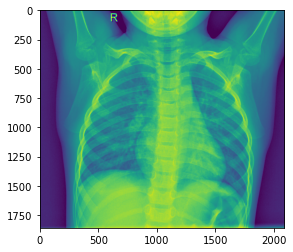

In [88]:
for img in os.listdir(train_normal):
    path=os.path.join(train_normal,img)
    img = Image.open(path)
    plt.imshow(img)
    break


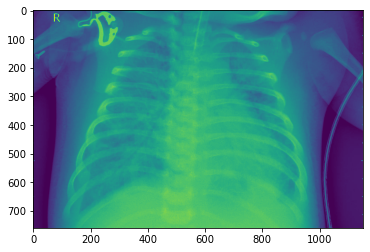

In [89]:
for img in os.listdir(train_pneumonia):
    path=os.path.join(train_pneumonia,img)
    img = Image.open(path)
    plt.imshow(img)
    break


In [90]:
train_label=train_df.loc[:,'target']

In [91]:
train_label

907     1.0
431     0.0
1838    1.0
3422    1.0
3213    1.0
       ... 
2518    1.0
103     1.0
3288    1.0
3024    1.0
1516    1.0
Name: target, Length: 5216, dtype: float64

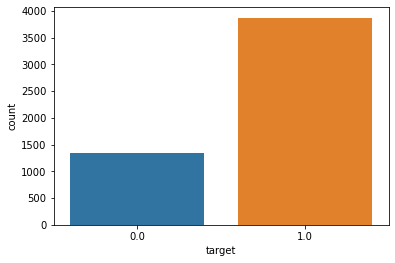

In [92]:
ax = sns.countplot(x=train_label)

The split of data in training samples

0-Normal

1-Pneumonia

In [93]:
test_label=test_df.loc[:,'target']

In [94]:
test_label

385    1.0
267    1.0
1      1.0
293    1.0
203    0.0
      ... 
73     1.0
164    1.0
1      0.0
329    1.0
163    0.0
Name: target, Length: 624, dtype: float64

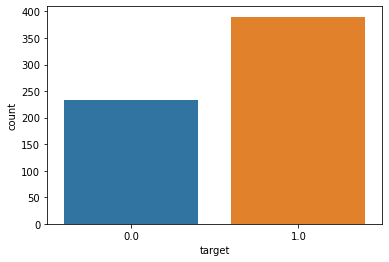

In [95]:
ax = sns.countplot(x=test_label)

The split of data in testing samples

0-Normal

1-Pneumonia

In [96]:
input_shape=(250,250,1)

model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Conv2D(32, (5, 5)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Dropout(.2))

model.add(Conv2D(128, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Dropout(.3))

model.add(Conv2D(128, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Dropout(.5))

model.add(Conv2D(256, (3, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
model.add(Dropout(.7))

model.add(Flatten()) # Output convert into one dimension layer and will go to Dense layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [97]:
model.compile(loss='binary_crossentropy', 
              optimizer='Adam',
              metrics=['accuracy'])

In [98]:
train_data=train_df.drop(['target'],axis=1)

In [99]:
train_data=np.array(train_data)
train_data

array([[0.30980392, 0.31764706, 0.34509804, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.26666667, 0.34509804, 0.35686275, ..., 0.        , 0.        ,
        0.        ],
       [0.14901961, 0.15294118, 0.15686275, ..., 0.09411765, 0.09411765,
        0.09411765],
       [0.04313725, 0.04313725, 0.04313725, ..., 0.02745098, 0.03529412,
        0.03137255]])

In [100]:

x= train_data.reshape(-1, 250, 250, 1)

In [101]:
x

array([[[[0.30980392],
         [0.31764706],
         [0.34509804],
         ...,
         [0.53333333],
         [0.44705882],
         [0.6       ]],

        [[0.30196078],
         [0.32156863],
         [0.35686275],
         ...,
         [0.52941176],
         [0.57254902],
         [0.61176471]],

        [[0.30196078],
         [0.3254902 ],
         [0.35294118],
         ...,
         [0.56470588],
         [0.58431373],
         [0.61568627]],

        ...,

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]]],


       [[[0.        ],
         [0.        ],
         [0.  

In [102]:
train_label

907     1.0
431     0.0
1838    1.0
3422    1.0
3213    1.0
       ... 
2518    1.0
103     1.0
3288    1.0
3024    1.0
1516    1.0
Name: target, Length: 5216, dtype: float64

In [103]:
test_data=test_df.drop(['target'],axis=1)

In [104]:
test_data=np.array(test_data)
test_data

array([[0.15686275, 0.11372549, 0.14509804, ..., 0.10196078, 0.10196078,
        0.10196078],
       [0.01960784, 0.02745098, 0.04313725, ..., 0.        , 0.        ,
        0.        ],
       [0.23137255, 0.14901961, 0.14901961, ..., 0.08235294, 0.08235294,
        0.2627451 ],
       ...,
       [0.08627451, 0.14509804, 0.12156863, ..., 0.12941176, 0.12941176,
        0.10196078],
       [0.83137255, 0.8       , 0.81960784, ..., 0.11372549, 0.12941176,
        0.16078431],
       [0.21960784, 0.23921569, 0.27058824, ..., 0.        , 0.        ,
        0.        ]])

In [105]:
x_val=test_data.reshape(-1, 250, 250, 1)

In [106]:
y_val=test_label

In [107]:
model.fit(x,train_label,epochs=10,validation_data=(x_val, y_val),batch_size=64)

Epoch 1/10
82/82 [==============================] - 268s 3s/step - loss: 0.6215 - accuracy: 0.7429 - val_loss: 0.6617 - val_accuracy: 0.6250
Epoch 2/10
82/82 [==============================] - 267s 3s/step - loss: 0.5064 - accuracy: 0.7653 - val_loss: 0.5585 - val_accuracy: 0.6571
Epoch 3/10
82/82 [==============================] - 266s 3s/step - loss: 0.3230 - accuracy: 0.8622 - val_loss: 0.3903 - val_accuracy: 0.8365
Epoch 4/10
82/82 [==============================] - 267s 3s/step - loss: 0.2518 - accuracy: 0.8967 - val_loss: 0.3887 - val_accuracy: 0.8141
Epoch 5/10
82/82 [==============================] - 266s 3s/step - loss: 0.2161 - accuracy: 0.9114 - val_loss: 0.4835 - val_accuracy: 0.7917
Epoch 6/10
82/82 [==============================] - 267s 3s/step - loss: 0.1727 - accuracy: 0.9369 - val_loss: 0.4041 - val_accuracy: 0.8141
Epoch 7/10
82/82 [==============================] - 14193s 173s/step - loss: 0.1632 - accuracy: 0.9375 - val_loss: 0.3994 - val_accuracy: 0.8109
Epoch 8/1